<h2><font color="#004D7F" size=6>Unidad 3. Preprocesamiento de datos</font></h2>




<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Italo Contreras Peerez</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Librerías y CSV](#section11)
* [2. Transformaciones](#section2)
    * [2.1. Escalamiento](#section21)
    * [2.2. Estandarización](#section22)
    * [2.3. Normalización](#section23)
    * [2.4. Binarización](#section24)
    * [2.5. Box-Cox](#section25)
    * [2.6. Yeo-Johnson](#section26)
* [3. Metodos de remuestreo](#section3)
    * [3.1. Validacion cruzada](#section31)
    * [3.2. Division en porcentaje](#section32)
        

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

Los datos en bruto, sin analizar de antemano, muy difícilmente nos va a dar precisiones robustas ya que, entre otros aspectos, muchos de ellos requieren los datos en una forma específica, por lo que deberemos realizar una transformación del conjunto de datos. 

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Cargando mi CSV</font>

Para esta práctica vamos a cargar el conjunto de datos del dataset escogido anteriormente y trabajar diferentes tipos de transformaciones de datos. 
Vamos a seguir la recomendacion del profe y eliminaremos las columnas 'month' y 'day' puesto que son strings 


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filename ='data/forestfires.csv'
data = pd.read_csv(filename)
data1=data.drop(['month'], axis=1)
data2=data1.drop(['day'], axis=1)
array = data2.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
#print(X)
data2
#names=['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
## <font color="#004D7F"> 2. Transformaciones</font>

Usaremos el metodo de ajuste y transformacion para este caso. Para ello usaremos la funcion fit() para preparar los parametros de la transformacio en los datos, luego de esto usaremos la funcion transform() para prepararlos para el modelado.
Tambien se puede usar el ajuste y transformacion a tareas unicas(es recomendable que sea asi) para ello ysaremos la funcion fit_transform()
Es importante ver como quedan los datos antes y después de transformarlos. En el siguiente código puede ver como quedan los datos originales y comparlos con cada transformación.

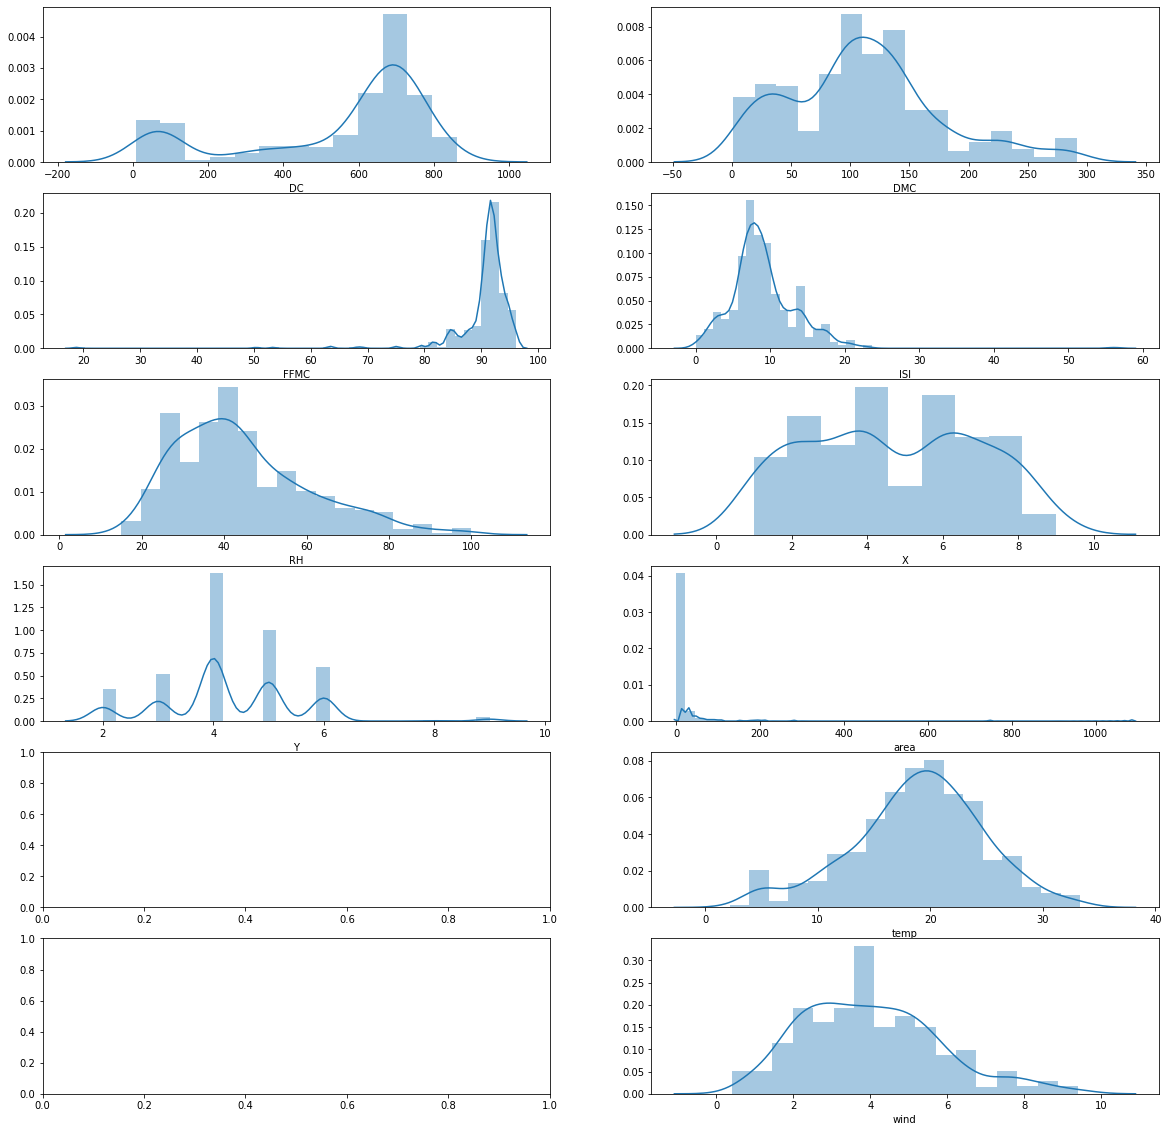

In [80]:
%matplotlib inline
# Histogramas univariados (Seaborn)
import matplotlib.pyplot as ptl
import seaborn as sns
f,axes=ptl.subplots(6,2,figsize=(20,20))
sns.distplot(data2["DC"],ax=axes[0,0])
sns.distplot(data2["DMC"],ax=axes[0,1])
sns.distplot(data2["FFMC"],ax=axes[1,0])
sns.distplot(data2["ISI"],ax=axes[1,1])
sns.distplot(data2["RH"],ax=axes[2,0])
sns.distplot(data2["X"],ax=axes[2,1])
sns.distplot(data2["Y"],ax=axes[3,0])
sns.distplot(data2["area"],ax=axes[3,1])
##sns.distplot(data["rain"],ax=axes[4,0])
sns.distplot(data2["temp"],ax=axes[4,1])
sns.distplot(data2["wind"],ax=axes[5,1])

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Escalamiento</font>

Aqui usaremos la clase MinMaxScaler, esta transofmracion es útil para algoritmos que ponderan entradas como Regression y Neural Networks y algoritmos que usan medidas de distancia como _k_-Nearest Neighbours. 

In [53]:
# Rescale data (between 0 and 1) 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X)
np.set_printoptions(precision=3)
# summarize transformed data
names=['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
print(names)
print(rescaledX[0:5, :])

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
[[0.75  0.429 0.871 0.086 0.101 0.091 0.193 0.424]
 [0.75  0.286 0.928 0.118 0.775 0.119 0.508 0.212]
 [0.75  0.286 0.928 0.147 0.796 0.119 0.399 0.212]
 [0.875 0.571 0.942 0.111 0.082 0.16  0.196 0.965]
 [0.875 0.571 0.911 0.173 0.111 0.171 0.296 0.988]]


Vemos que los datos estan entre 0 y 1 dado que asi fue definido en la funcion MinMaxScaler, luego vermeos que esto es un caso particular de escalamiento que se llama Normalizacion

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Estandarización</font>

Aqui usaremos la clase StandardScaler, con esto se lograra que cada atributo tenga de media 0 y de desviacion estandar 1
Esta tranformacion es más adecuada para técnicas que asumen una distribución gaussiana en las variables de entrada y funcionan mejor con datos reescalados, como Linear Regression, Logistic Regression y Linear Discriminant Analysis.

In [54]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X)
rescaledX=scaler.transform(X)
# summarize transformed data
names=['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
print(names)
print(rescaledX[0:5, :])

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
[[ 1.008  0.57  -0.806 -1.323 -1.83  -0.861 -1.843  0.412]
 [ 1.008 -0.244 -0.008 -1.18   0.489 -0.51  -0.153 -0.692]
 [ 1.008 -0.244 -0.008 -1.05   0.561 -0.51  -0.739 -0.692]
 [ 1.441  1.384  0.191 -1.212 -1.898 -0.005 -1.825  3.234]
 [ 1.441  1.384 -0.244 -0.931 -1.799  0.127 -1.291  3.356]]


Ahora cada columna(perteneciente a cada atributo mostrado) tiene de media 0 y desvaicion 1

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Normalización</font>

Aqui usaremos la clase Normalizer. Este método de preprocesamiento puede ser útil para conjuntos de datos dispersos (muchos ceros) con atributos de escalas variables cuando se utilizan algoritmos que ponderan valores de entrada como Neural Networks y algoritmos que usan medidas de distancia como k-Nearest Neighbours.

In [55]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
scaler=Normalizer().fit(X)
normalizedX=scaler.transform(X)
# summarize transformed data
names=['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
print(names)
print(normalizedX[0:5, :])

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
[[0.05  0.036 0.613 0.186 0.671 0.036 0.058 0.363]
 [0.01  0.006 0.134 0.052 0.988 0.01  0.027 0.049]
 [0.01  0.006 0.13  0.063 0.988 0.01  0.021 0.047]
 [0.05  0.038 0.578 0.21  0.488 0.057 0.052 0.611]
 [0.045 0.034 0.506 0.291 0.579 0.054 0.065 0.561]]


Como habiamos dicho anteriormente este es un caso particular de escalamiento, como podemos observar todos los datos estan entre 0 y 1

<a id="section24"></a>
## <font color="#004D7F"> 2.4. Binarización</font>

Aca se usa la clase [Binarizer]
Puede ver que todos los valores iguales o menores que 0 están marcados con 0 y todos los que están por encima de 0 están marcados con 1.

In [56]:
# binarization
from sklearn.preprocessing import Binarizer
binarizer=Binarizer(threshold=0.0).fit(X)
binaryX=binarizer.transform(X)
# summarize transformed data
names=['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
print(names)
print(binaryX[0:5 :])

['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


En este caso vemos que todos los valores son positivos entonces estan marcados con 1

<a id="section25"></a>
## <font color="#004D7F"> 2.5. Box-Cox</font>

En ocasiones los atributos representan el llamado sesgo o inclinación, que es cuando un atributo tiene una distribución similar a la Gaussiana pero esta se encuentra desplazada. Para este tipo de casos, se utiliza la transformación Box-Cox, la cual asume que todos los valores son positivos, que lo que realiza es el sesgo y hacer más Gaussiana la distribución de este atributo. Nótese que aplicamos la transformación sólo a dos atributos que parecen tener un sesgo.

C:\Users\Italo\anaconda3\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 432x288 with 0 Axes>

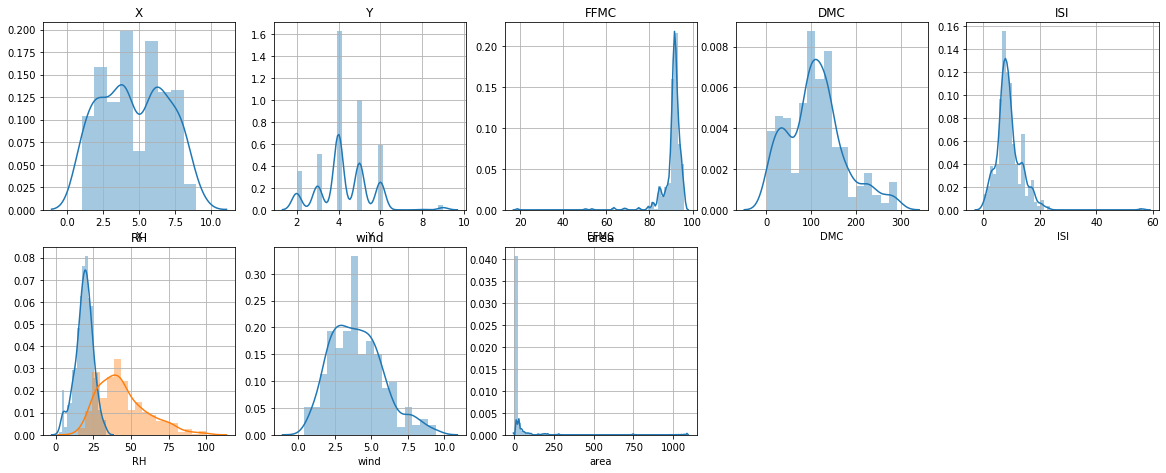

In [57]:
#names=['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
# Univariate Histograms
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(5,5,1)
sns.distplot(data2['X'])
plt.title('X')
plt.grid(True)

plt.subplot(5,5,2)
sns.distplot(data2['Y'])
plt.title('Y')
plt.grid(True)

plt.subplot(5,5,3)
sns.distplot(data2['FFMC'])
plt.title('FFMC')
plt.grid(True)

#names=['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
plt.subplot(5,5,4)
sns.distplot(data2['DMC'])
plt.title('DMC')
plt.grid(True)

plt.subplot(5,5,5)
sns.distplot(data2['ISI'])
plt.title('ISI')
plt.grid(True)

plt.subplot(5,5,6)
sns.distplot(data2['temp'])
plt.title('temp')
plt.grid(True)


plt.subplot(5,5,6)
sns.distplot(data2['RH'])
plt.title('RH')
plt.grid(True)


plt.subplot(5,5,7)
sns.distplot(data2['wind'])
plt.title('wind')
plt.grid(True)

#plt.subplot(5,5,8)
#sns.distplot(data2['rain'])
#plt.title('rain')
#plt.grid(True)

plt.subplot(5,5,8)
sns.distplot(data2['area'])
plt.title('area')
plt.grid(True)


Usaremos la clase [PowerTransformer] para corregir el sesgo de 3 caracteristicas ( X,Y,FFMC) Una vez realizada la transformación podemos ver como se encuentra corregido el sesgo inicial de ambas características.

In [60]:
# Box-Cox Transform
from sklearn.preprocessing import PowerTransformer
#names=['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']


features=data2[['X','Y','FFMC']]
pt=PowerTransformer(method='box-cox',standardize=True,) 

skl_boxcox = pt.fit(features) 
calc_lambdas = skl_boxcox.lambdas_ 
skl_boxcox = pt.transform(features)
df_features = pd.DataFrame(data2=skl_boxcox,columns=['X','Y','FFMC'])

data2.drop(['X'],axis=1,inplace=True)
data2.drop(['Y'],axis=1,inplace=True)
data2.drop(['FFMC'],axis=1,inplace=True)                                                     
#data2.drop(['FFMC'],axis=1,inplace=True)
#data2.drop(['DMC'],axis=1,inplace=True)
#data2.drop(['DC'],axis=1,inplace=True)
#data2.drop(['ISI'],axis=1,inplace=True)
#data2.drop(['temp'],axis=1,inplace=True)
#data2.drop(['RH'],axis=1,inplace=True)
#data2.drop(['wind'],axis=1,inplace=True)
#data2.drop(['area'],axis=1,inplace=True)

df_data = pd.concat([data2,df_features] , axis=1) 
cols = df_data.columns.tolist()
cols

TypeError: __init__() got an unexpected keyword argument 'data2'

<Figure size 432x288 with 0 Axes>

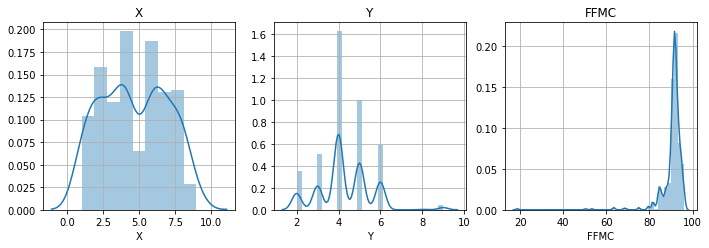

In [61]:
# Univariate Histograms
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(5,5,1)
sns.distplot(data2['X'])
plt.title('X')
plt.grid(True)

plt.subplot(5,5,2)
sns.distplot(data2['Y'])
plt.title('Y')
plt.grid(True)

plt.subplot(5,5,3)
sns.distplot(data2['FFMC'])
plt.title('FFMC')
plt.grid(True)


### Yeo Johnson

<a id="section26"></a>
## <font color="#004D7F"> 2.6. Yeo-Johnson</font>

La transformación de Yeo-Johnson es otra transformación de potencia como Box-Cox, pero soporta valores en bruto (sin procesar) que son iguales a cero y negativos. Para utilizar esta transformación únicamente tenemos que poner en la propiedad `method` de la clase `PowerTransformer` el valor `yeo-johnson` o directamente no poner `method` ya que por defecto utiliza esta transoformación.

In [63]:
# Box-Cox Transform
from sklearn.preprocessing import PowerTransformer
#names=['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']


features=data2[['X','Y','FFMC']]
pt=PowerTransformer(method='yeo-johnson',standardize=True,) 

skl_boxcox = pt.fit(features) 
calc_lambdas = skl_boxcox.lambdas_ 
skl_boxcox = pt.transform(features)
df_features = pd.DataFrame(data2=skl_boxcox,columns=['X','Y','FFMC'])

data2.drop(['X'],axis=1,inplace=True)
data2.drop(['Y'],axis=1,inplace=True)
data2.drop(['FFMC'],axis=1,inplace=True)                                                     
#data2.drop(['FFMC'],axis=1,inplace=True)
#data2.drop(['DMC'],axis=1,inplace=True)
#data2.drop(['DC'],axis=1,inplace=True)
#data2.drop(['ISI'],axis=1,inplace=True)
#data2.drop(['temp'],axis=1,inplace=True)
#data2.drop(['RH'],axis=1,inplace=True)
#data2.drop(['wind'],axis=1,inplace=True)
#data2.drop(['area'],axis=1,inplace=True)

df_data = pd.concat([data2,df_features] , axis=1) 
cols = df_data.columns.tolist()
cols

TypeError: __init__() got an unexpected keyword argument 'data2'

<Figure size 432x288 with 0 Axes>

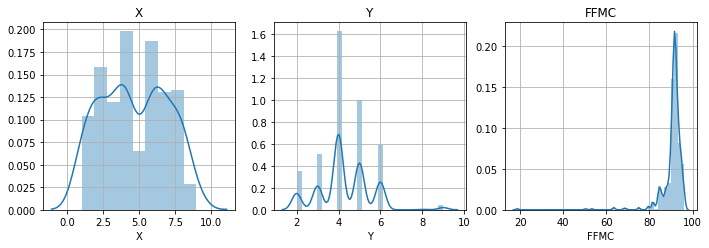

In [64]:
# Univariate Histograms
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(5,5,1)
sns.distplot(data2['X'])
plt.title('X')
plt.grid(True)

plt.subplot(5,5,2)
sns.distplot(data2['Y'])
plt.title('Y')
plt.grid(True)

plt.subplot(5,5,3)
sns.distplot(data2['FFMC'])
plt.title('FFMC')
plt.grid(True)

<a id="section3"></a>
## <font color="#004D7F"> 3. Metodos de remuestreo</font>

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Validacion cruzada</font>

Método de validación cruzada de k-fold: implica dividir el conjunto de datos en k-particiones, también llamados fold. Cada subconjunto se mantiene mientras el modelo se entrena en todos los demás particiones. Este proceso se repite hasta que se determina la precisión para cada instancia en el conjunto de datos, y se proporciona una estimación de precisión general. Es un método robusto para estimar la precisión, y el tamaño de k puede ajustar la cantidad de sesgo en la estimación, con valores populares establecidos en 5 y 10.


In [84]:
#!pip install sklearn 
# Evaluate using Cross Validation
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

num_folds = 10 
seed = 7 
kfold = KFold( n_splits=num_folds , random_state=seed) 
model = LinearRegression()
results = cross_val_score (model, X, Y, cv=kfold) 
print(f"MAE: {results.mean() }")

MAE: -0.021014877095954988


C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Vemos que el MAE es -0.02 < 0 es decir no se acerca mucho a un modelo de regresion, en otras palabras, no es muy preciso

Método de validación cruzada de k-fold con repeticion: Aqui se puede repetir varias veces el proceso de dividir los datos _k-fold_. En este caso, la precisión final del modelo se toma como la media del número de repeticiones.

Al igual que el caso anterior podemos observar que nos informa tanto la media como la desviación estándar de la medida de rendimiento.

In [69]:
# Evaluate using Cross Validation
from sklearn.model_selection import RepeatedKFold 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

num_folds=10 
seed=7 
num_repeated = 5
repeatedkfold = RepeatedKFold(n_splits=num_folds,n_repeats=num_repeated, random_state=seed) 
model = LinearRegression()
results = cross_val_score (model, X, Y, cv=repeatedkfold) 
print(f"MAE: {results.mean() }")

MAE: 0.04054231494337846


Al ser el MAE cercano a 0 nos dice que este modelo no se comporta bien como un modelo de regresion, es decir, no es muy preciso

Metodo de  Validación cruzada dejando uno fuera: Aqui se omite una instancia de datos y se construye un modelo en todas las demás instancias de datos en el conjunto de entrenamiento, repitiéndose este proceso para todas las instancias de datos. El resultado es una gran cantidad de medidas de rendimiento que se pueden resumir en un esfuerzo por proporcionar una estimación más razonable del Accuracy de su modelo.


In [71]:
# Evaluate using Leave One Out Cross Validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

loocv=LeaveOneOut()
model = LinearRegression()
results = cross_val_score (model, X, Y, cv=loocv)
print(f"MAE: {results.mean() }")

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

MAE: nan


C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

<a id="section32"></a>
## <font color="#004D7F"> 3.2. Division en porcentaje</font>

La división de datos implica la partición de los datos en un conjunto de datos de entrenamiento explícito utilizado para preparar el modelo y un conjunto de datos de validación invisible (se dice validación invisible ya que aunque se conozca el atributo clase el modelo lo omitirá para una vez realizada la predicción compararlo para ver si ha acertado) que se utiliza para evaluar el rendimiento del modelo en datos no etiquetados. 


In [75]:
# Evaluate using a train and a test set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

test_size = 0.33 
seed = 7 
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=test_size , random_state=seed)
model = LinearRegression()
model. fit (X_train , Y_train ) 
result = model. score (X_test , Y_test ) 
print(f"MAE: {results.mean() }")


MAE: nan


Vemos que el MAE es nan(0) es decir no se ajusta bien a un modelo e regresion

Otra variación en la validación cruzada de k-fold es crear una división aleatoria de los datos como la división de train/test descrita anteriormente, pero repetir el proceso de división y evaluación del algoritmo varias veces, como la validación cruzada. El siguiente ejemplo divide los datos en una división de train/test del 67%/33% y repite el proceso 10 veces.


In [79]:
# Evaluate using Shuffle Split Cross Validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

test_size = 0.33 
seed = 7 
n_splits=10
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=test_size , random_state=seed)

kfold=ShuffleSplit(n_splits=n_splits,test_size=test_size,random_state=seed)
model = LinearRegression()
model. fit (X_train , Y_train ) 
result = cross_val_score(model,X,Y,cv=kfold) 
print(f"MAE: {results.mean() }")


MAE: nan


Vemos aqui tambien que el MAE es 0 es decir con esto tenemos mas certeza que los datos no se comportan como una regresion

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>